---
### Подготовка

Импорт библиотек

In [1]:
import statistics as stat
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display
plt.rc('font', family='Verdana')
from sklearn.decomposition import PCA, KernelPCA

<br />
Подготовка данных из задания

In [2]:
a = [-4.3, -6.2, -3.8, -7.9, -4.1, -6.9, -4, -4.2]
anp = np.array(a)
b = [2.1, -2.7, 8.7, 0.5, 9.1, 1.7, 9.4, 8.6]
bnp = np.array(b)

<br />
Функция сходства
$$
K({\bf x}_i,{\bf x}_j)=||{\bf x}_i-{\bf x}_j||^2\\
$$

### Задание №1 

**1**. Построить диаграмму рассеяния точек.<br /><br />

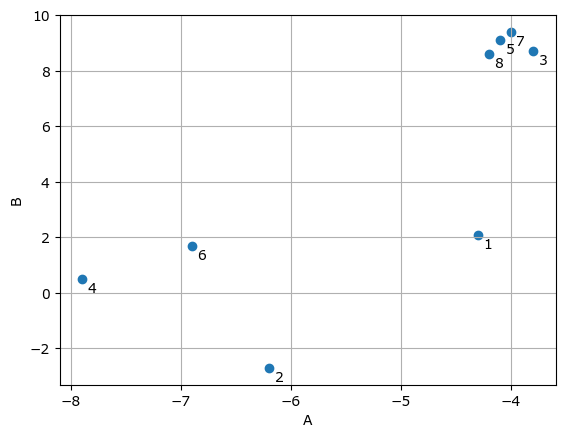

In [3]:
plt.scatter(a, b)
for i in a:
    x = a.index(i)
    y = b[a.index(i)]
    plt.annotate(f'{x + 1}', (i + 0.05, y - 0.5))
plt.xlabel('A')
plt.ylabel('B')
plt.grid()

**2**. Рассчитать ядерную матрицу.<br />

$$
\begin{pmatrix}
K(\bf x_{1},  x_{1}) & \cdots & K(\bf x_{1},  x_{n})\\
 \vdots & \ddots & \vdots\\
K(\bf x_{n},  x_{1}) & \cdots & K(\bf x_{n},  x_{n})
 \end{pmatrix} 
 $$

In [4]:
matrix = []
for i in a:
    x1 = i
    y1 = b[a.index(i)]
    templ = []
    for j in b:
        x2 = a[b.index(j)]
        y2 = j
        dot = [x1 - x2, y1 - y2] 
        temp = np.linalg.norm(dot) ** 2
        templ.append(round(temp, 3))
    matrix.append(templ)

idcs = []
for i in range(8):
    idcs.append('x' + f'{i + 1}')

pd.DataFrame(matrix, index = idcs, columns = idcs)


,x1,x2,x3,x4,x5,x6,x7,x8
x1,0.00,26.65,43.81,15.52,49.04,6.92,53.38,42.26
x2,26.65,0.00,135.72,13.13,143.65,19.85,151.25,131.69
x3,43.81,135.72,0.00,84.05,0.25,58.61,0.53,0.17
x4,15.52,13.13,84.05,0.00,88.40,2.44,94.42,79.30
x5,49.04,143.65,0.25,88.40,0.00,62.60,0.10,0.26
x6,6.92,19.85,58.61,2.44,62.60,0.00,67.70,54.90
x7,53.38,151.25,0.53,94.42,0.10,67.70,0.00,0.68
x8,42.26,131.69,0.17,79.30,0.26,54.90,0.68,0.00


<br />
Подготовка данных из задания

In [5]:
X1 = [-21, -52, 26, 1, 183, 0, -201, 24]
X1np = np.array(X1)
X2 = [243, -36, 95, 158, 260, 86, -157, -38]
X2np = np.array(X2)
D = np.stack([X1, X2])

### Задание №2

**1**. Построить диаграмму рассеяния.<br /><br />

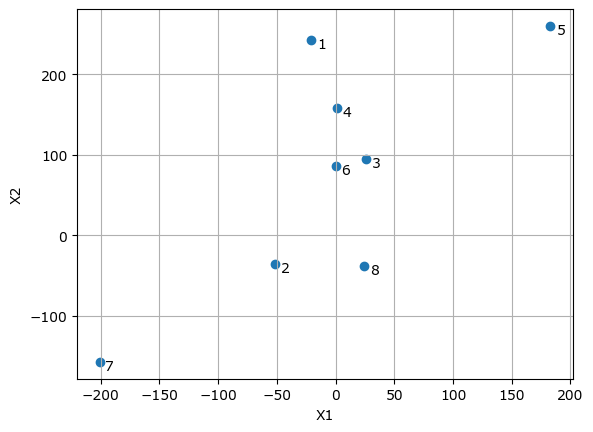

In [6]:
plt.scatter(X1, X2)
for i in X1:
    x = X1.index(i)
    y = X2[X1.index(i)]
    plt.annotate(f'{x + 1}', (i + 5, y - 10))
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()


**2**. Рассчитайте среднее **μ** для матрицы **D**, ковариационную матрицу **Σ** для матрицы **D** и ковариационную матрицу **Σ<sub>c</sub>**  для центрированной матрицы **D**<br /><br />

In [7]:
mean = [np.mean(X1), np.mean(X2)]
mdf = pd.DataFrame(mean, index = ["X1", "X2"], columns = ["Среднее"])
display(mdf)

cov = np.round(np.cov(D), 3)
cdf = pd.DataFrame(cov, index = ["", ""], columns = ["Ков. матрица", ""])
display(cdf)

ccov = np.round(np.cov(D-np.reshape(mean, [2,1])),3)
сcdf = pd.DataFrame(ccov, index = ["", ""], columns = ["Ц. ков. матрица", ""])
display(сcdf)

,Среднее
X1,-5.000
X2,76.375


,Ков. матрица,
,11155.429,11525.286
,11525.286,21251.125


,Ц. ков. матрица,
,11155.429,11525.286
,11525.286,21251.125


**3**. Рассчитайте собственные числа и собственные вектора для матрицы **Σ<sub>c</sub>**.<br /><br />

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(ccov)

for i in range(4):
    if i < 2:
        print('Собственное число', i+1, '=', round(eigenvalues[i], 3))
    else:
        print('Собственный вектор', i-1, '=', np.round(eigenvectors[i-2], 3))

Собственное число 1 = 3621.028
Собственное число 2 = 28785.526
Собственный вектор 1 = [-0.837 -0.547]
Собственный вектор 2 = [ 0.547 -0.837]


**4**. Выведите индекс (порядковый номер), соответствующий первой главной компоненте.<br /><br />


In [9]:
PGK = [0, 0]

tc = 1
for i in eigenvalues:
    if abs(i) > PGK[0]: 
        PGK[0] = abs(i)
        PGK[1] = tc
    tc += 1

print(PGK[1])

2


**5**. Рассчитайте первый главный компонент. Постройте точечный график полученного вектора (добавить к каждой точке ее номер).<br /><br />


,1,2,3,4,5,6,7,8
Первый главный компонент,-130.712736,119.777016,-32.551984,-71.604426,-256.566714,-10.792169,302.585648,79.865365


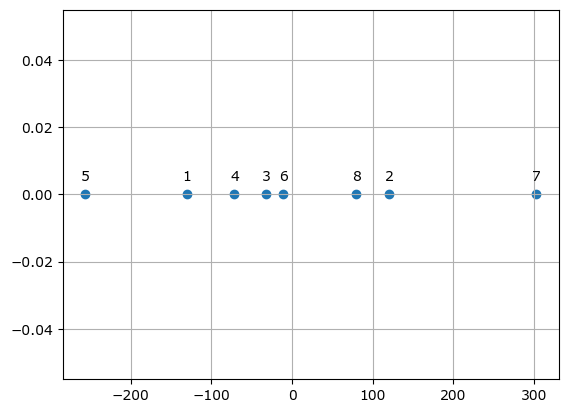

In [10]:
ev = eigenvectors[:, 1]
PGKt = np.dot(ev, D-np.reshape(mean, [2,1]))
Ptdf = pd.DataFrame(np.reshape(PGKt, [1,8]), index = ["Первый главный компонент"], columns = np.arange(1,9))
display(Ptdf)

tc = 1
plt.scatter(PGKt, np.zeros(len(PGKt)))
for i in PGKt:
    plt.annotate(tc, (i - 5, 0.004))
    tc += 1
plt.grid()

**6**. Используя PCA из библиотеки sklearn, получите первую главную компоненту для матрицы **D**. Постройте точечный график полученного вектора.<br /><br />


,1,2,3,4,5,6,7,8
Первый главный компонент \(sklearn\),-130.712737,119.777016,-32.551984,-71.604426,-256.566713,-10.792169,302.585647,79.865366


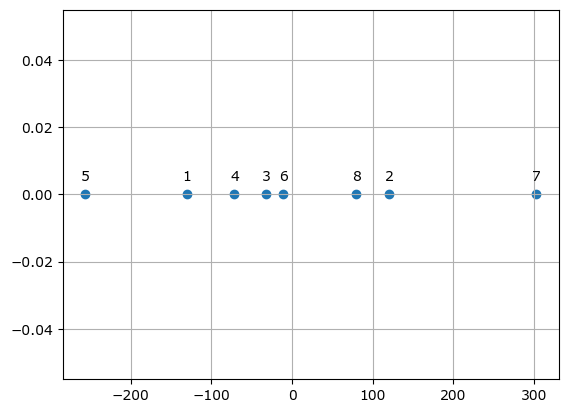

In [11]:
pca = PCA(n_components = 1)
PGKt_sk = pca.fit_transform(D.T)
Ptsdf = pd.DataFrame(np.reshape(PGKt_sk, [1,8]), index = ["Первый главный компонент \(sklearn\)"], columns = np.arange(1,9))
display(Ptsdf)

tc = 1
plt.scatter(PGKt_sk, np.zeros(len(PGKt_sk)))
for i in PGKt_sk:
    plt.annotate(tc, (i - 5, 0.004))
    tc += 1
plt.grid()

**7**. Визуально сравните графики, полученные в пунктах **5** и **6**. Убедитесь в корректности выполнения преобразований.<br /><br />


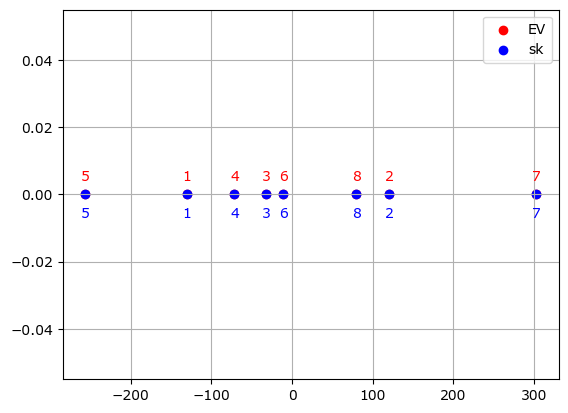

In [12]:
plt.scatter(PGKt, np.zeros(len(PGKt)), color = 'r', label = 'EV')
plt.scatter(PGKt_sk, np.zeros(len(PGKt_sk)), color = 'b', label = 'sk')

tc = 1
for i in PGKt:
    plt.annotate(tc, (i - 5, 0.004), color = 'r')
    tc += 1

tc = 1
for i in PGKt_sk:
    plt.annotate(tc, (i - 5, - 0.007), color = 'b')
    tc += 1

plt.legend()
plt.grid()

Проекция данных на *ось X2* сравнима с результатами PCA преобразований.

**8**. **μ** и **Σ** сверху задают нормальное распределение, из которого были сгенерированы точки. Постройте диаграмму рассеяния, которая позволит определить ориентацию / размеры облака точек, полученного с помощью 2-мерной функции плотности вероятности. 

   На отдельном линейном графике постройте графики функций плотностей вероятности отдельных компонентов 2-мерного нормального распределения.
<br /><br />

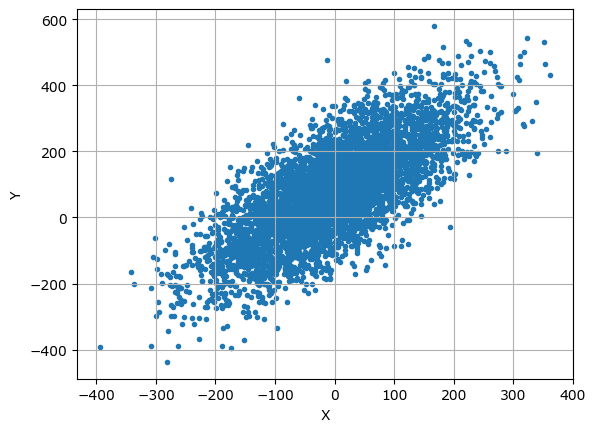

In [13]:
x, y = np.transpose(np.random.multivariate_normal(mean, cov , 5000))
plt.scatter(x, y, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

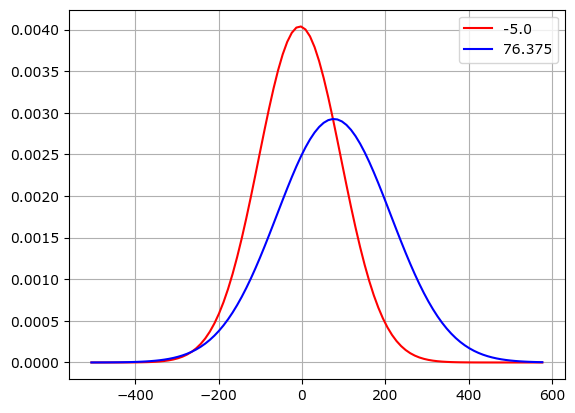

In [14]:
VarX1 = np.var(X1np)
SkoX1 = np.sqrt(VarX1)

VarX2 = np.var(X2np)
SkoX2 = np.sqrt(VarX2)

Ox = np.linspace(mean[0]-500, mean[1]+500, 100)

Oy1 = (1 / (SkoX1 * np.sqrt(2 * np.pi))) * np.exp(-((Ox - mean[0]) **2) / (2 * VarX1))
Oy2 = (1 / (SkoX2 * np.sqrt(2 * np.pi))) * np.exp(-((Ox - mean[1]) **2) / (2 * VarX2))

plt.plot(Ox, Oy1, color = 'r', label = f'{mean[0]}')
plt.plot(Ox, Oy2, color = 'b', label = f'{mean[1]}')

plt.legend()
plt.grid()

### Задание №3

**1**. Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании для заданного ядра. Постройте точечный график полученного вектора (добавить к каждой точке ее номер).<br /><br />

,1,2,3,4,5,6,7,8
Первый главный компонент,-59.26451,-193.773164,111.305685,-124.294008,119.394991,-87.093315,127.674156,106.050165


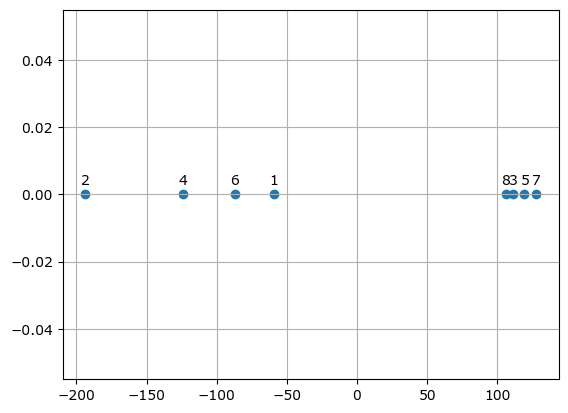

In [15]:
M1 = np.ones([8,8])
MI = np.eye(8)
M18 = M1 * 1/8
Mt = MI - M18
M = np.matmul(np.matmul((Mt),matrix), (Mt))

eigenvalues, eigenvectors = np.linalg.eigh(M)

PGK = [0,0]
tc = 0
for i in eigenvalues:
    if abs(i) > PGK[0]: 
        PGK[0] = abs(i)
        PGK[1] = tc
    tc += 1

ev = eigenvectors[:, PGK[1]]
Mdot = np.dot(ev, M)
Mddf = pd.DataFrame(np.reshape(Mdot, [1,8]), index = ["Первый главный компонент"], columns = np.arange(1,9))
display(Mddf)

tc = 0
plt.scatter(Mdot, np.zeros(8))
for i in Mdot:
    plt.annotate(tc + 1, (Mdot[tc] - 3, 0.003))
    tc += 1
plt.grid()

**2**. Используя KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1, получите первую главную компоненту для данных из первого задания. Постройте точечный график полученного вектора (добавить к каждой точке ее номер).<br /><br />

Ядро Гаусса считается как
$$
K({\bf x,y}) = exp  \{\frac{ \parallel x-y \parallel ^2 }{2\sigma ^2}\}
$$
<br />

,1,2,3,4,5,6,7,8
Первый главный компонент,-31.5028,-99.38103,47.955481,-73.613079,50.6018,-53.195475,54.721045,44.17424


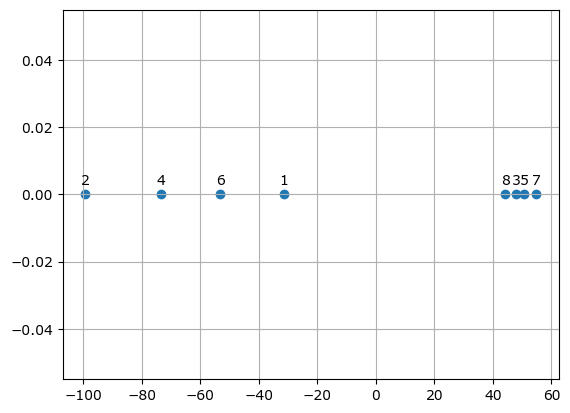

In [16]:
pca = KernelPCA(kernel='rbf', gamma=1)
pca.fit_transform(np.transpose(matrix))

PGK = [0,0]
tc = 0
for i in pca.eigenvalues_:
    if abs(i) > PGK[0]: 
        PGK[0] = abs(i)
        PGK[1] = tc
    tc += 1

ev = pca.eigenvectors_[:, PGK[1]]
Mdot = np.dot(ev, matrix)
Mddf = pd.DataFrame(np.reshape(Mdot, [1,8]), index = ["Первый главный компонент"], columns = np.arange(1,9))
display(Mddf)

tc = 0
plt.scatter(Mdot, np.zeros(8))
for i in Mdot:
    plt.annotate(tc + 1, (Mdot[tc] -1.5, 0.003))
    tc += 1
plt.grid()

**3**. Визуально сравните графики, полученные в пунктах **1** и **2**. Определите, использование какого ядра (из первого задания или ядра Гаусса) позволяет, на ваш взгляд, лучше визуально выделить принадлежность точки к одному из двух кластеров.<br /><br />

Графики в пунктах визуально почти одинаковы, визуально выделить принадлежность точки к одному из двух кластеров таким образом можно с использованием любого ядра.

---
### Вывод

В процессе выполнения практической работы были получены навыки использования библиотек Python при изучении и применения метода главных компонент. Проведена сравнительная работа разных методов алгоритмов, предоставляемых sklearn и numpy. Сделаны выводы на основании визуализации полученных данных с помощью matplotlib. Изучено средство jupyter nbconvert.

### Используемые источники

1. Машинное обучение. Учебное пособие. Темы: 
   - Ядерные методы. Ядерные матрицы. Гауссово ядро
   - Снижение размерности. Метод главных компонент. Алгоритм 3.1
   - Ядерный анализ главных компонент. Алгоритм 3.2
2. [Как работает метод главных компонент (PCA) на простом примере](https://habr.com/ru/post/304214/)
3. [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), [RBF kernel](https://scikit-learn.org/stable/modules/metrics.html#rbf-kernel)
